### Admixture Analyse 


Suite au filtrage LD avec les 601 945 SNPs, il est obtenu 590 724 SNPs qui ont donc subit un filtrage LD indirectement, en effet puisqu'ils sont matchés avec des SNPs déjà filtrés par LD=0.3 on considère que ceux la aussi aurait aussi "passer" le filtre LD=0.3 



On va donc utiliser Plink pour obtenir le .bed necessaire à l'Admixture

Ensuite on doit changer les noms de chromosomes en chiffres car Admixture accepte seulement les noms de chromosomes humains. Pour cela on passe les noms de chromosome en chiffres de 1 à 16 

Enfin on effectue l'Admixture



Pour cela, on lance le script Admixture.sh :



```bash
#!/bin/sh 

#Chargement des modules

module load -f /home/agirardon/work/seqapipopOnHAV3_1/program_module/module

#Variables

VCF=/home/agirardon/work/seqapipopOnHAV3_1/combineGVCFs/LesVCF/Concatenate/outisecautresens/MetaGenotypesCalled403_raw_snps_filtre_isec_plink.vcf.gz 
OUT=SeqApiPop403

# Generer les input file dans le format plink

plink --vcf $VCF --allow-extra-chr --make-bed --out $OUT \

# ADMIXTURE accept pas les noms de chromosome qui ne sont pas humains donc on change les noms de chromosomes par chiffre de 1 à 16 

sed -i -e 's/NC_037638.1/1/g' $OUT.bim 
sed -i -e 's/NC_037639.1/2/g' $OUT.bim
sed -i -e 's/NC_037640.1/3/g' $OUT.bim
sed -i -e 's/NC_037641.1/4/g' $OUT.bim
sed -i -e 's/NC_037642.1/5/g' $OUT.bim
sed -i -e 's/NC_037643.1/6/g' $OUT.bim
sed -i -e 's/NC_037644.1/7/g' $OUT.bim
sed -i -e 's/NC_037645.1/8/g' $OUT.bim
sed -i -e 's/NC_037646.1/9/g' $OUT.bim
sed -i -e 's/NC_037647.1/10/g' $OUT.bim
sed -i -e 's/NC_037648.1/11/g' $OUT.bim
sed -i -e 's/NC_037649.1/12/g' $OUT.bim
sed -i -e 's/NC_037650.1/13/g' $OUT.bim
sed -i -e 's/NC_037651.1/14/g' $OUT.bim
sed -i -e 's/NC_037652.1/15/g' $OUT.bim
sed -i -e 's/NC_037653.1/16/g' $OUT.bim




#ADMIXTURE

for K in {2..16}
do
	admixture --cv  $OUT.bed $K > log${K}.out
	
done

```

Plusieurs fichiers sont donc obtenues : 

- Les logX.out contenant la valeur de CV  
- les SeqApiPop403.X.Q contenant la Q matrix servant pour ploter l'Admixture

Pour identifier la meilleure valeur de k clusters, correspondant à la valeur de cross validation la plus faible, on collecte les CV errors grâce au script:  ObtainCVerror.sh

```bash
#!/bin/bash

#obtainCVerrorAllSeqApiPop.bash


grep CV log* | \
    awk -v var="$i" 'BEGIN{OFS="\t"}{print $3,$4, var}' | \
    sed 's/(K=//' | \
    sed 's/)://' | \
    awk 'BEGIN{FS="_";OFS="\t"}{print $1,$4,$3}' | \
    awk 'BEGIN{OFS="\t"}{print $1,$2,$4,$5}' > CV_error
```

On a donc toutes les valeurs de CVerror :

```bash
less CV_error
```

```
10      0.47957         
11      0.48664         
2       0.50381         
3       0.49099         
4       0.48733         
5       0.48134         
6       0.47882         
7       0.47483         
8       0.47760         
9       0.47784   
```

On va donc maintenant pouvoir ploter les CV errors :



In [1]:
setwd("/home/avignal/Stage_M2/Admixture")

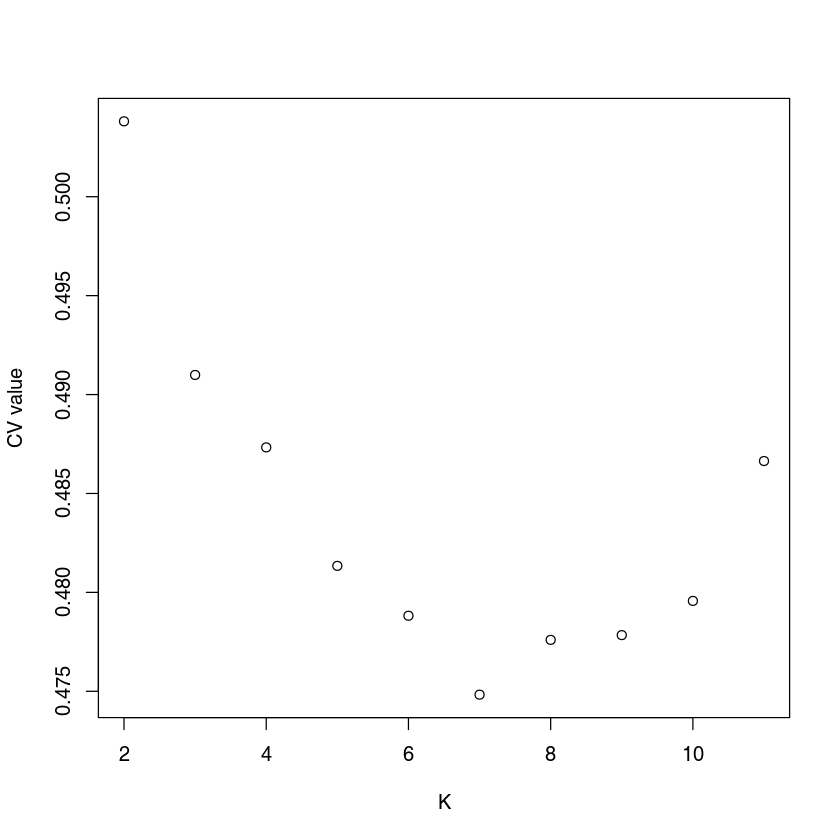

In [2]:
CV_error=read.table('CV_error')

plot((CV_error),  xlab="K",
        ylab="CV value")

Ici on peut donc voir que selon ce graphe, la meilleure valeur de K serait 7 car en effet la valeur de CVerror la plus basse est pour un K=7

Maintenant on va donc ploter l'admixture grâce à 'pong': 

```bash
pong -m /home/avignal/Stage_M2/Admixture/Q_file_K2K12_1r -i /home/avignal/Stage_M2/Admixture/Popnonsorted.txt -n /home/avignal/Stage_M2/Admixture/Listpop.txt 
```

m utilise le fichier Q_file_K2K12_1r : 

```
SeqApiPop403_2_Q	2	/home/avignal/Stage_M2/Admixture/SeqApiPop403.2.Q
SeqApiPop403_3_Q	3	/home/avignal/Stage_M2/Admixture/SeqApiPop403.3.Q
SeqApiPop403_4_Q	4	/home/avignal/Stage_M2/Admixture/SeqApiPop403.4.Q
SeqApiPop403_5_Q	5	/home/avignal/Stage_M2/Admixture/SeqApiPop403.5.Q
SeqApiPop403_6_Q	6	/home/avignal/Stage_M2/Admixture/SeqApiPop403.6.Q
SeqApiPop403_7_Q	7	/home/avignal/Stage_M2/Admixture/SeqApiPop403.7.Q
SeqApiPop403_8_Q	8	/home/avignal/Stage_M2/Admixture/SeqApiPop403.8.Q
SeqApiPop403_9_Q	9	/home/avignal/Stage_M2/Admixture/SeqApiPop403.9.Q
SeqApiPop403_10_Q	10	/home/avignal/Stage_M2/Admixture/SeqApiPop403.10.Q
SeqApiPop403_11_Q	11	/home/avignal/Stage_M2/Admixture/SeqApiPop403.11.Q
SeqApiPop403_12_Q	12	/home/avignal/Stage_M2/Admixture/SeqApiPop403.12.Q
```

i utilise le fichier Popnonsorted.txt  :

```
CorseAnciennes
CorseAnciennes
CorseAnciennes
CorseAnciennes
CorseAnciennes
CorseAnciennes
CorseAnciennes
CorseAnciennes
...
RoyalJellyFrance
RoyalJellyFrance
RoyalJellyFrance
RoyalJellyFrance
RoyalJellyFrance
RoyalJellyFrance
RoyalJellyFrance
```

n utilise le fichier couleur_sort_individu :

```
IberiensisSpain	Iberiensis Spain
MelliferaOuessant	Mellifera Ouessant
MelliferaFrancePorquerolles	Mellifera France Porquerolles
MelliferaFranceSollies	Mellifera France Sollies
MelliferaFranceSarthe	Mellifera France Sarthe
MelliferaFranceAriege	Mellifera France Ariege
MelliferaFrancehautpyrenees	Mellifera France haut pyrenees
MelliferaBrittanyFrance	Mellifera Brittany France
MelliferaScotland	Mellifera Scotland
LigusticaItaly	Ligustica Italy
CarnicaSlovenia	CarnicaS lovenia
CarnicaGermany	Carnica Germany
CarnicaFrance	Carnica France
CarnicaSwitzerland	Carnica Switzerland
CarnicaPoland	Carnica Poland
CaucasiaFrance	Caucasia France 
RoyalJellyFrance	Royal Jelly France 
CorseAnciennes	Corse Anciennes
CorseNouvelles	Corse Nouvelles
BuckfastSwitzerland	Buckfast Switzerland 
Tarn1	Tarn1 France
Tarn2	Tarn2 France
Brittanybreeder	Brittany Breeder
Unknow	Unknow1
```

Cela nous permet de renvoyer en sortie les plots suivants:

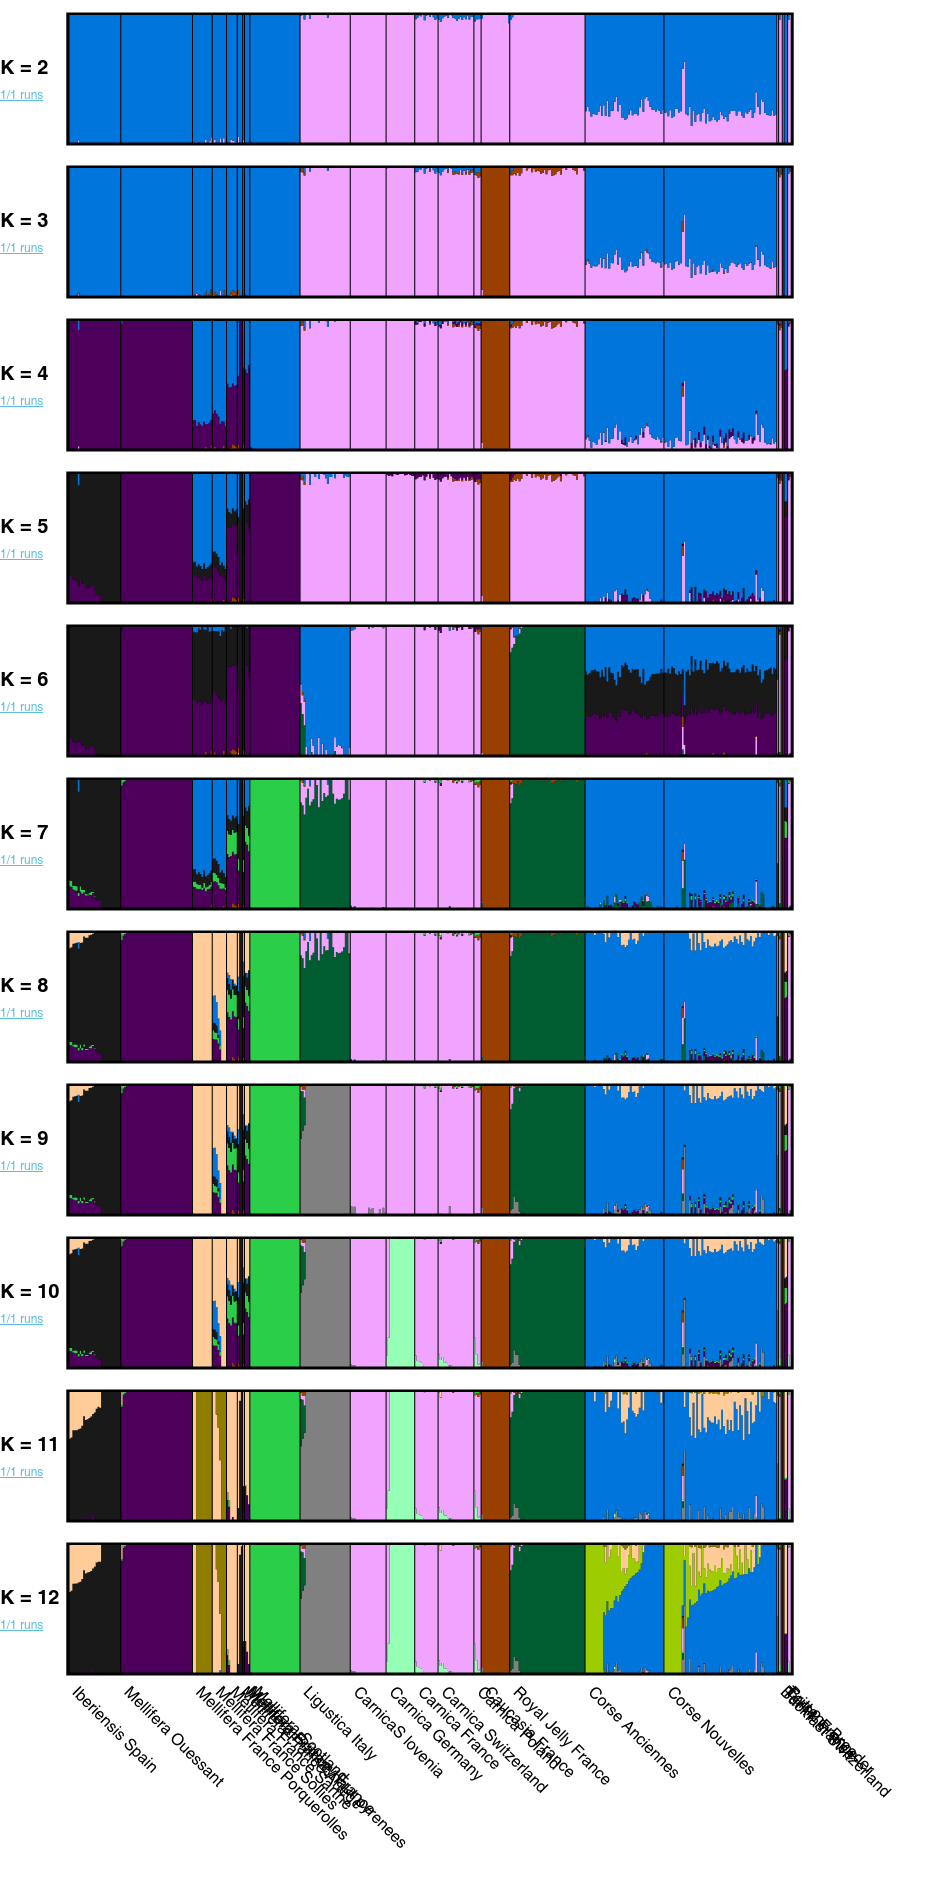

On constate ici que les plots obtenus ne correspondent pas à nos attentes, en effet très vite les Corse obtiennent leur propre fond génétique, alors qu'on s'attend plutôt à un mellange entre Ligustica (italiennes) et Mellifera de France

### Admixture sur 50 runs

On va maintenant effectuer l'Admixture sur 50 runs, on va donc preparer 50 scripts différents (valeur -s aleatoire) qui vont permettre de lancer 50 runs d'admixture différents, le script suivant nous permet d'effectuer cela:


LaunchAdmixtureRunsWriteScripts.sh

```bash

#!/bin/bash

#launchAdmixtureRunsWriteScriptsMAF001.bash

for i in $(seq 00 49)
do 
mkdir SeqApiPop_403_MAF001_rep${i}

echo \#!/bin/bash > SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh
echo
echo \#admixtureAnalysis_multiThread.sh >> SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh
echo >> SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh
echo module load -f  /home/gencel/vignal/save/000_ProgramModules/program_module  >> SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh
echo >> SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh
echo IN=/home/agirardon/work/seqapipopOnHAV3_1/Admixture/SeqApiPop403.bed >> SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh
echo >> SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh
echo "for K in 2 3 4 5 6 7 8 9 10 11 12 13;" >> SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh
echo do >> SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh
echo -e sbatch --cpus-per-task=4 --mem-per-cpu=4G \\ >> SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh
echo -e "    -J \${K}admixt -o \/home/agirardon/work/seqapipopOnHAV3_1/Admixture/SeqApiPop_403_MAF001_rep${i}/SeqApiPop_403_MAF001_rep${i}.\${K}.o -e \/home/agirardon/work/seqapipopOnHAV3_1/Admixture/SeqApiPop_403_MAF001_rep${i}/SeqApiPop_403_MAF001_rep${i}.\${K}.e" \\ >> SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh
echo -en '    --wrap="cd SeqApiPop_403_MAF001_rep'${i}' ; admixture --cv'  >> SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh
echo -en " -s ${RANDOM}"  >> SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh
echo  -e ' ${IN} ${K} -j4 | tee /home/agirardon/work/seqapipopOnHAV3_1/Admixture/SeqApiPop_403_MAF001_rep'${i}'/SeqApiPop_403_MAF001_rep'${i}'.log${K}"' >> SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh
echo done >> SeqApiPop_403_MAF001_rep${i}/admixtureAnalysis.sh

done


```



On obtient donc 50 scripts d'admixture avec des valeurs de -s differentes. 

Example de script:

```bash

#!/bin/bash
#admixtureAnalysis_multiThread.sh

module load -f /home/gencel/vignal/save/000_ProgramModules/program_module

IN=/home/agirardon/work/seqapipopOnHAV3_1/Admixture/SeqApiPop403.bed

for K in 2 3 4 5 6 7 8 9 10 11 12 13;
do
sbatch --cpus-per-task=4 --mem-per-cpu=4G \
    -J ${K}admixt -o \/home/agirardon/work/seqapipopOnHAV3_1/Admixture/SeqApiPop_403_MAF001_rep0/SeqApiPop_403_MAF001_rep0.${K}.o -e \/home/agirardon/work/seqapipopOnHAV3_1/Admixture/SeqApiPop_403_MAF001_rep0/SeqApiPop_403_MAF001_rep0.${K}.e \
    --wrap="cd SeqApiPop_403_MAF001_rep0 ; admixture --cv -s 2607 ${IN} ${K} -j4 | tee /home/agirardon/work/seqapipopOnHAV3_1/Admixture/SeqApiPop_403_MAF001_rep0/SeqApiPop_403_MAF001_rep0.log${K}"
done

```

On recupère donc les CVerror des 50 runs grâce au script  ObtainCVerrorAllSeqApiPop.sh : 

```bash

#!/bin/bash

#obtainCVerrorAllSeqApiPop.bash

for i in ` ls | grep  ^SeqApiPop`
do
grep CV ${i}/*log* | \
    awk -v var="$i" 'BEGIN{OFS="\t"}{print $3,$4, var}' | \
    sed 's/(K=//' | \
    sed 's/)://' | \
    awk 'BEGIN{FS="_";OFS="\t"}{print $1,$4,$3}' | \
    awk 'BEGIN{OFS="\t"}{print $1,$2,$4,$5}' >> CVerrors.list
done

```

on obtient donc le fichier CVerrors :

```bash

head -3 CVerrors 
10	0.48424	rep9	MAF001
11	0.48020	rep9	MAF001
12	0.48701	rep9	MAF001

```
On peut donc maintenant ploter nos CV des 50 runs.



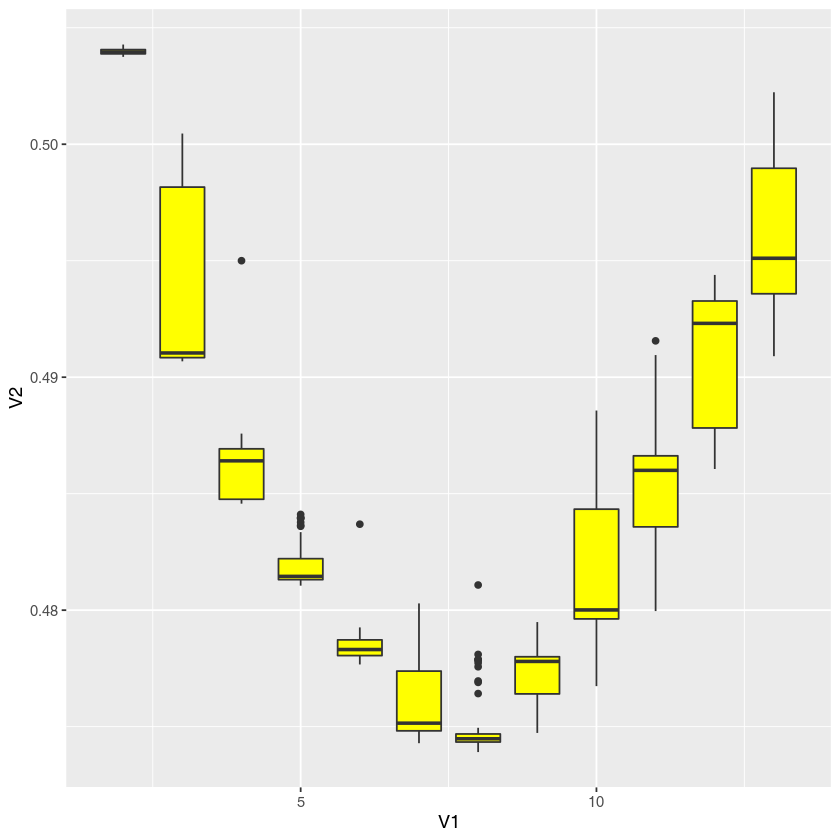

In [27]:
setwd("/home/avignal/Stage_M2/Admixture/")

CVerrors=read.table('CVerrors50runs')


library (ggplot2)


ggplot(CVerrors) +
geom_boxplot(aes(group=V1, y=V2, x=V1), fill ="yellow")



Ici on peut donc voir que selon ce graphe, la meilleure valeur de K serait 8 car en effet la valeur de CVerror la plus basse est pour un K=8

Maintenant on va donc ploter l'admixture grâce à 'pong', cependant on va garder seulement les Q matrix des K allant de 2 à 9 notament car au delà on s'attend à des résultats non significatifs et que le PC ne peux pas ouvrir le browser du resultat de pong avec toutes les valeurs de K :

pong -m /home/avignal/Stage_M2/Admixture/Qfile/test_k2_9 -i /home/avignal/Stage_M2/Admixture/Sorted_SeqApiPop403.list -n /home/avignal/Stage_M2/Admixture/couleur_sort_individu

m utilise le fichier test_k2_9 :

```
SeqApiPop403_2_r0_Q	2	/home/avignal/Stage_M2/Admixture/Qfile/SeqApiPop403.2.r0.Q
SeqApiPop403_2_r10_Q	2	/home/avignal/Stage_M2/Admixture/Qfile/SeqApiPop403.2.r10.Q
SeqApiPop403_2_r11_Q	2	/home/avignal/Stage_M2/Admixture/Qfile/SeqApiPop403.2.r11.Q
...
SeqApiPop403_9_r7_Q	9	/home/avignal/Stage_M2/Admixture/Qfile/SeqApiPop403.9.r7.Q
SeqApiPop403_9_r8_Q	9	/home/avignal/Stage_M2/Admixture/Qfile/SeqApiPop403.9.r8.Q
SeqApiPop403_9_r9_Q	9	/home/avignal/Stage_M2/Admixture/Qfile/SeqApiPop403.9.r9.Q
```


i utilise le fichier Popnonsorted.txt  :

```
CorseAnciennes
CorseAnciennes
CorseAnciennes
CorseAnciennes
CorseAnciennes
CorseAnciennes
CorseAnciennes
CorseAnciennes
...
RoyalJellyFrance
RoyalJellyFrance
RoyalJellyFrance
RoyalJellyFrance
RoyalJellyFrance
RoyalJellyFrance
RoyalJellyFrance
```

n utilise le fichier couleur_sort_individu :

```
IberiensisSpain	Iberiensis Spain
MelliferaOuessant	Mellifera Ouessant
MelliferaFrancePorquerolles	Mellifera France Porquerolles
MelliferaFranceSollies	Mellifera France Sollies
MelliferaFranceSarthe	Mellifera France Sarthe
MelliferaFranceAriege	Mellifera France Ariege
MelliferaFrancehautpyrenees	Mellifera France haut pyrenees
MelliferaBrittanyFrance	Mellifera Brittany France
MelliferaScotland	Mellifera Scotland
LigusticaItaly	Ligustica Italy
CarnicaSlovenia	CarnicaS lovenia
CarnicaGermany	Carnica Germany
CarnicaFrance	Carnica France
CarnicaSwitzerland	Carnica Switzerland
CarnicaPoland	Carnica Poland
CaucasiaFrance	Caucasia France 
RoyalJellyFrance	Royal Jelly France 
CorseAnciennes	Corse Anciennes
CorseNouvelles	Corse Nouvelles
BuckfastSwitzerland	Buckfast Switzerland 
Tarn1	Tarn1 France
Tarn2	Tarn2 France
Brittanybreeder	Brittany Breeder
Unknow	Unknow1
```

Cela nous permet de renvoyer en sortie les plots suivants:




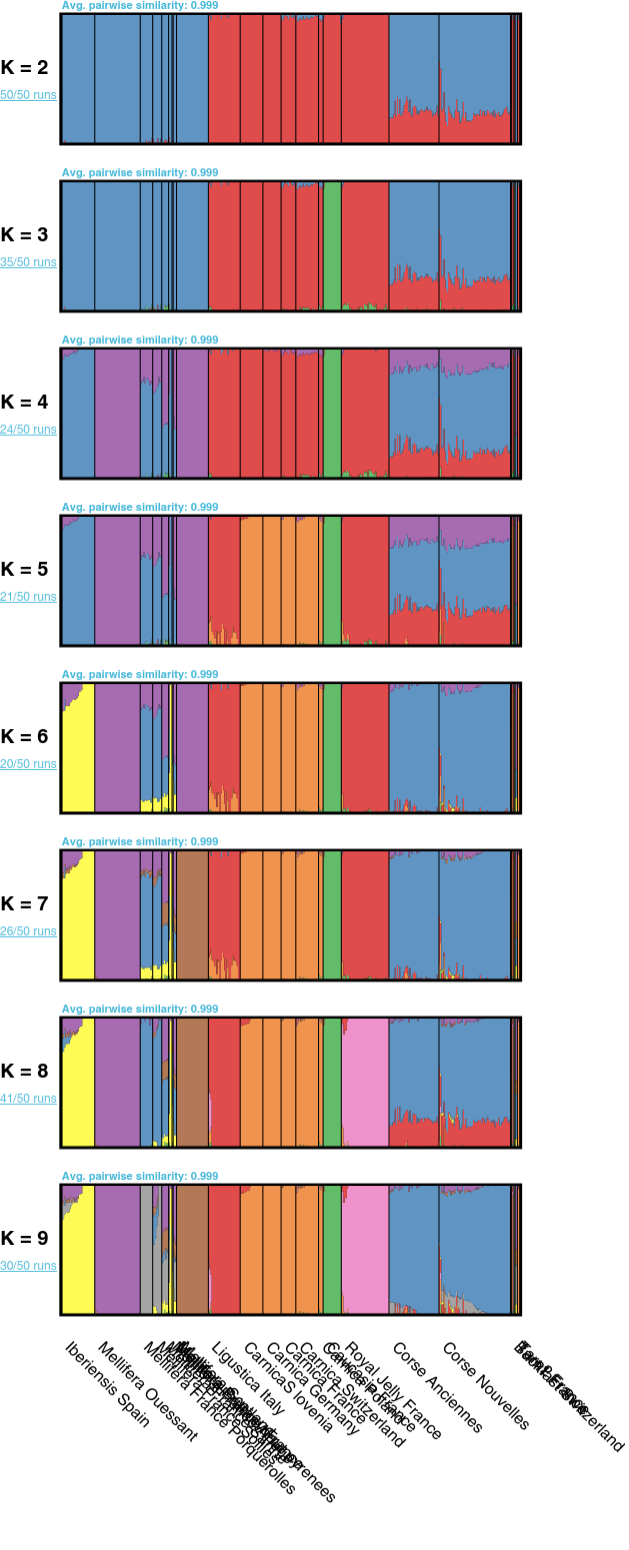

Ici on retrouve les résultats auxquels on s'attendait, c'est à dire que pour la meilleure valeur de K (K=8), obtenu précement grâce au boxplot des CVerrors. Nous retrouvons bien les 2 fonds génétiques attendus pour les Corses, c'est à dire Ligustica Italy et Mellifera Francaises.

On remarque cependant qu'on a 2 idividus avec des fonds génétiques qui semblent différents des autres pour les Corse Nouvelles, en effet nous avions constaté lors de la PCA, que 2 individus se trouvaient en marge des autres (CORjaune 55 et CORjaune62A), correspondant tres certainement à ces individus là.


 Pour verifier cela, on regarde notre liste d'individus : 
 
- on remarque que pour CORjaune55 correspond à la ligne 145 et CORjaune62A correspond à la ligne 154. 
- On regarde donc maintenant les Q matrix qui ont permis de faire le plot, ici on choisi la Q matrix k=8 et run=0 et on va au ligne correspondante c'est à dire, ligne 145 et 154 et on obtient les resultats suivants :

ligne 145 : 0.239189 0.426997 0.052176 0.014670 0.077932 0.184265 0.002252 0.002518

ligne 154 : 0.581322 0.369320 0.000010 0.000010 0.000010 0.039153 0.007416 0.002759 

et d'apres cette Q matrix et le plot, en s'aidant des individus quasiment 100% rouge et 100% bleu on a pu determiner que la colone 1 correspond à la couleur rouge, et la colone 2 correspond à la couleur bleu, cela semble plutot bien correspondre au plot suivant, des 2 individus qui semble différents : 

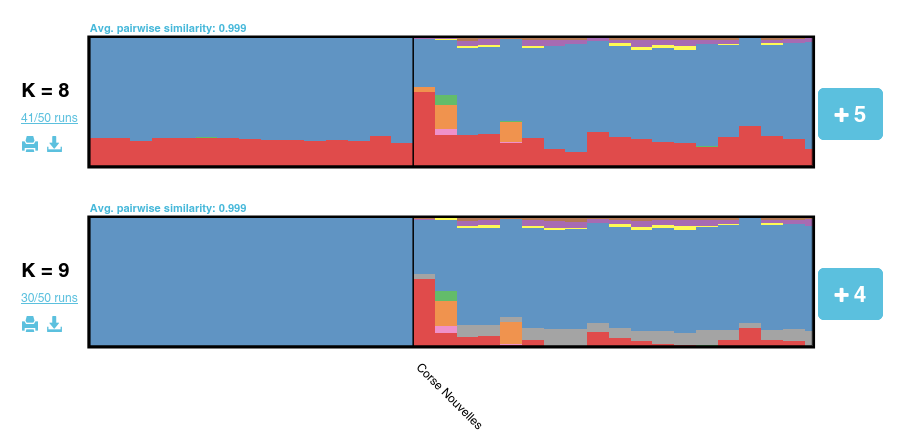
 